# Project 6 OpenClassroom

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
# To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

import cv2 as cv

from PIL import Image

# To be able to use Warning
import warnings

Python Version :sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.5
Pandas Version :1.0.5
Seaborn Version :0.10.1


### Init of the main variables

In [2]:
# Disable the warnings "ignore"
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
# Load Pep8 checker
%load_ext pycodestyle_magic
%pycodestyle_on
picture_directory = './Flipkart/Images-SIFT/'

### Reading of the file

In [3]:
input_df = pd.read_csv('./DataSet.csv', sep=",", header=0)

In [ ]:
input_df

###### Display the main categories

In [4]:
main_categories = input_df['product_main_category'].unique()

### Display a picture from each category

In [5]:
def clean_picture(imagename):
    grayscaleimage = cv.imread(picture_directory+imagename, cv.IMREAD_GRAYSCALE)
    equalizedimage = cv.equalizeHist(grayscaleimage)
    nonoiseimage = cv.fastNlMeansDenoising(equalizedimage, None, 3, 7, 21)
    return grayscaleimage, equalizedimage, nonoiseimage

In [6]:
def save_clean_picture(imagename):
    grayscaleimage, equalizedimage, nonoiseimage = clean_picture(imagename)
    cv.imwrite(picture_directory+imagename.split('.jpg')[0]+'_clean.jpg', nonoiseimage)
    # cv.imwrite(picture_directory+imagename+'_clean.jpg', nonoiseimage)

In [9]:
def clean_picture_display(imagename, topic):
    # grayscaleimage = cv.imread(picture_directory+imagename, cv.IMREAD_GRAYSCALE)
    # equalizedimage = cv.equalizeHist(grayscaleimage)
    # nonoiseimage = cv.fastNlMeansDenoising(equalizedimage, None, 3, 7, 21)
    grayscaleimage, equalizedimage, nonoiseimage = clean_picture(imagename)
    fig, axs = plt.subplots(1, 6, figsize=(60, 12))
    axs[0].set_title('Original Picture in grayscale for '+topic, fontsize=20)
    axs[0].imshow(grayscaleimage, cmap='Greys_r')
    axs[1].set_title('Histogram of the original Picture in grayscale for '+topic, fontsize=20)
    axs[1].set_xlabel('Level of gray', fontsize=20)
    axs[1].set_ylabel('Number of pixels', fontsize=20)
    axs[1].hist(grayscaleimage.ravel(), 256, [0, 256])
    axs[2].set_title('The contrast is adjusted for '+topic, fontsize=20)
    axs[2].imshow(equalizedimage, cmap='Greys_r')
    axs[3].set_title('Histogram when the contrast is adjusted for '+topic, fontsize=20)
    axs[3].set_xlabel('Level of gray', fontsize=20)
    axs[3].set_ylabel('Number of pixels', fontsize=20)
    axs[3].hist(equalizedimage.ravel(), 256, [0, 256])
    axs[4].set_title('The noise is removed for '+topic, fontsize=1)
    axs[4].imshow(nonoiseimage, cmap='Greys_r')
    axs[5].set_title('Histogram when the noise is removed for '+topic, fontsize=20)
    axs[5].set_xlabel('Level of gray', fontsize=20)
    axs[5].set_ylabel('Number of pixels', fontsize=20)
    axs[5].hist(nonoiseimage.ravel(), 256, [0, 256])

Home Furnishing 
55b85ea15a1536d46b7190ad6fff8ce7.jpg
Baby Care 
7b72c92c2f6c40268628ec5f14c6d590.jpg
Watches 
893aa5ed55f7cff2eccea7758d7a86bd.jpg
Home Decor & Festive Needs 
f0938b0d88eac91deee6d5add54097d3.jpg
Kitchen & Dining 
e9420e9483f16db81c64dddf99f34841.jpg
Beauty and Personal Care 
2d50e4c6ccf8befe9335ac8f97a11712.jpg
Computers 
d1899ab1d5c79ddaa311bc9f04d198ed.jpg


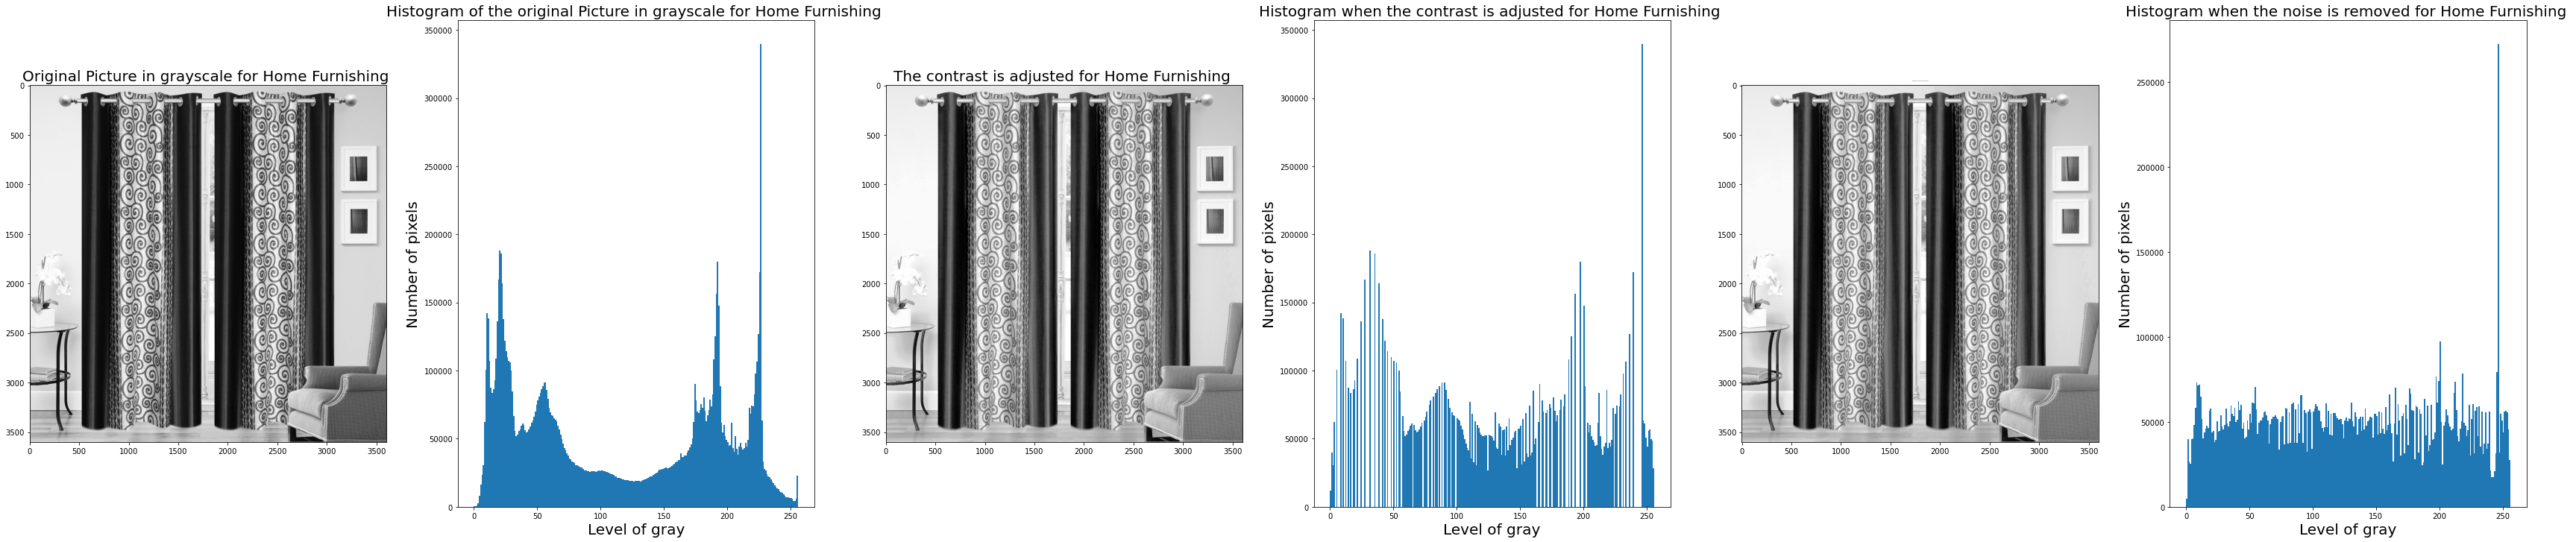

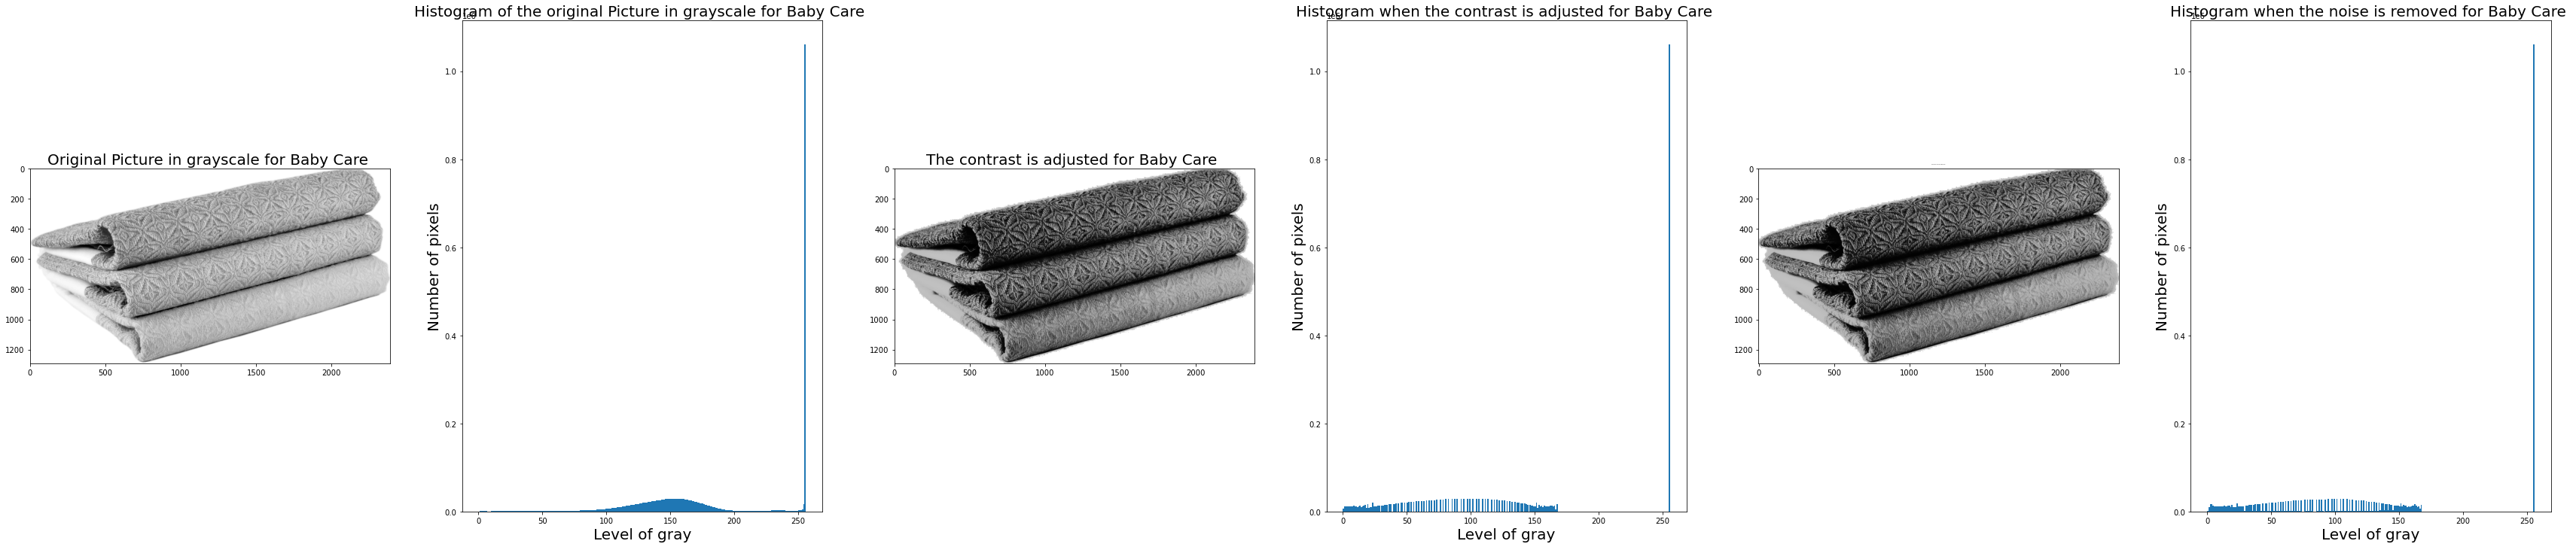

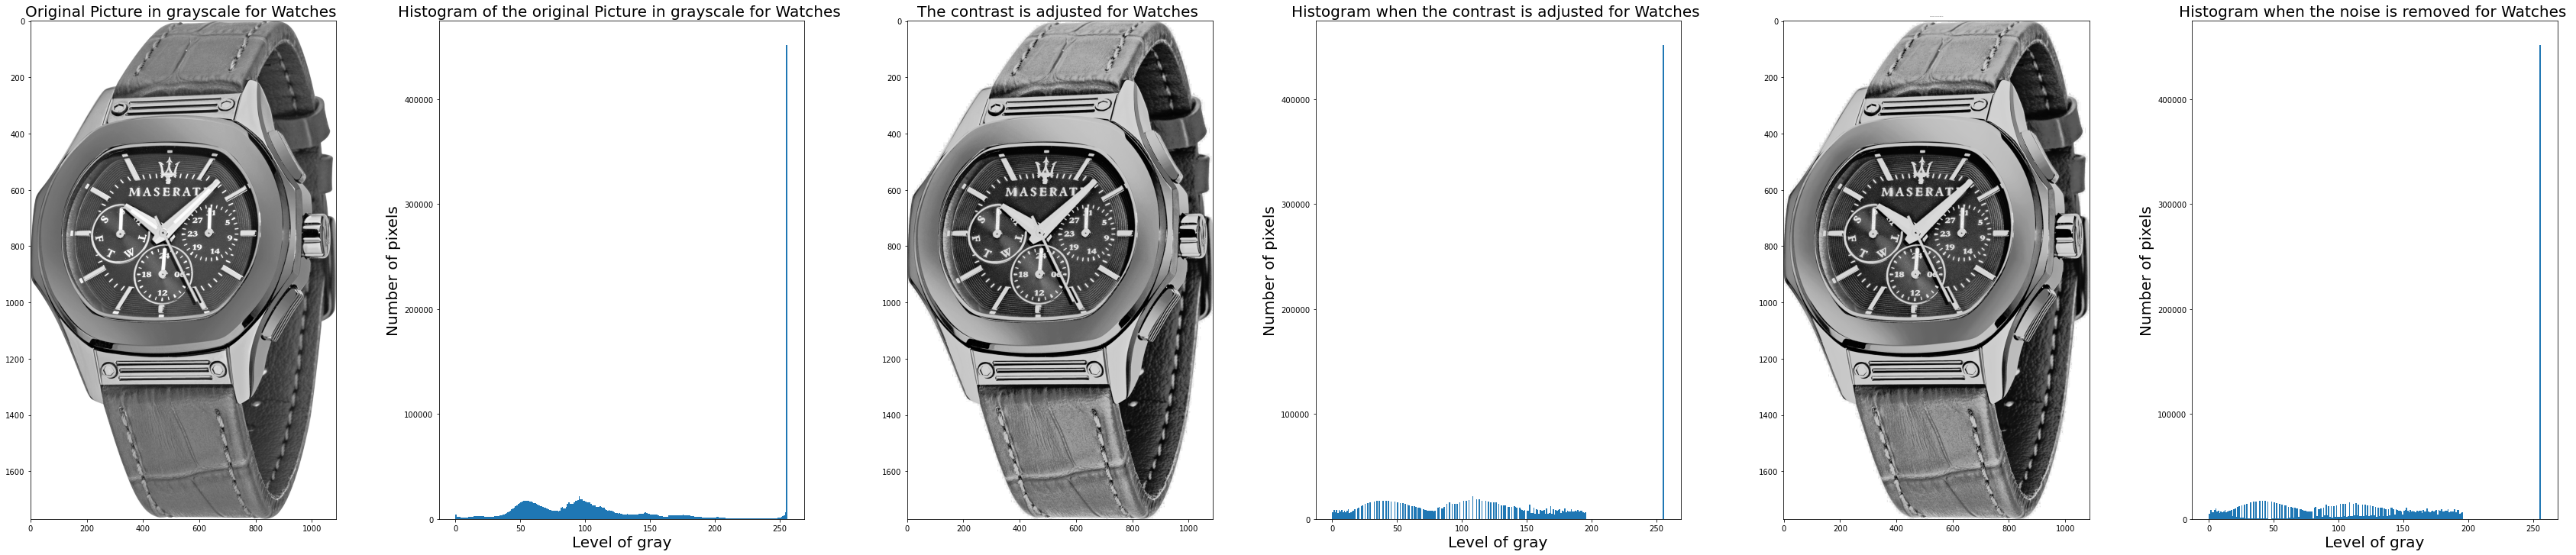

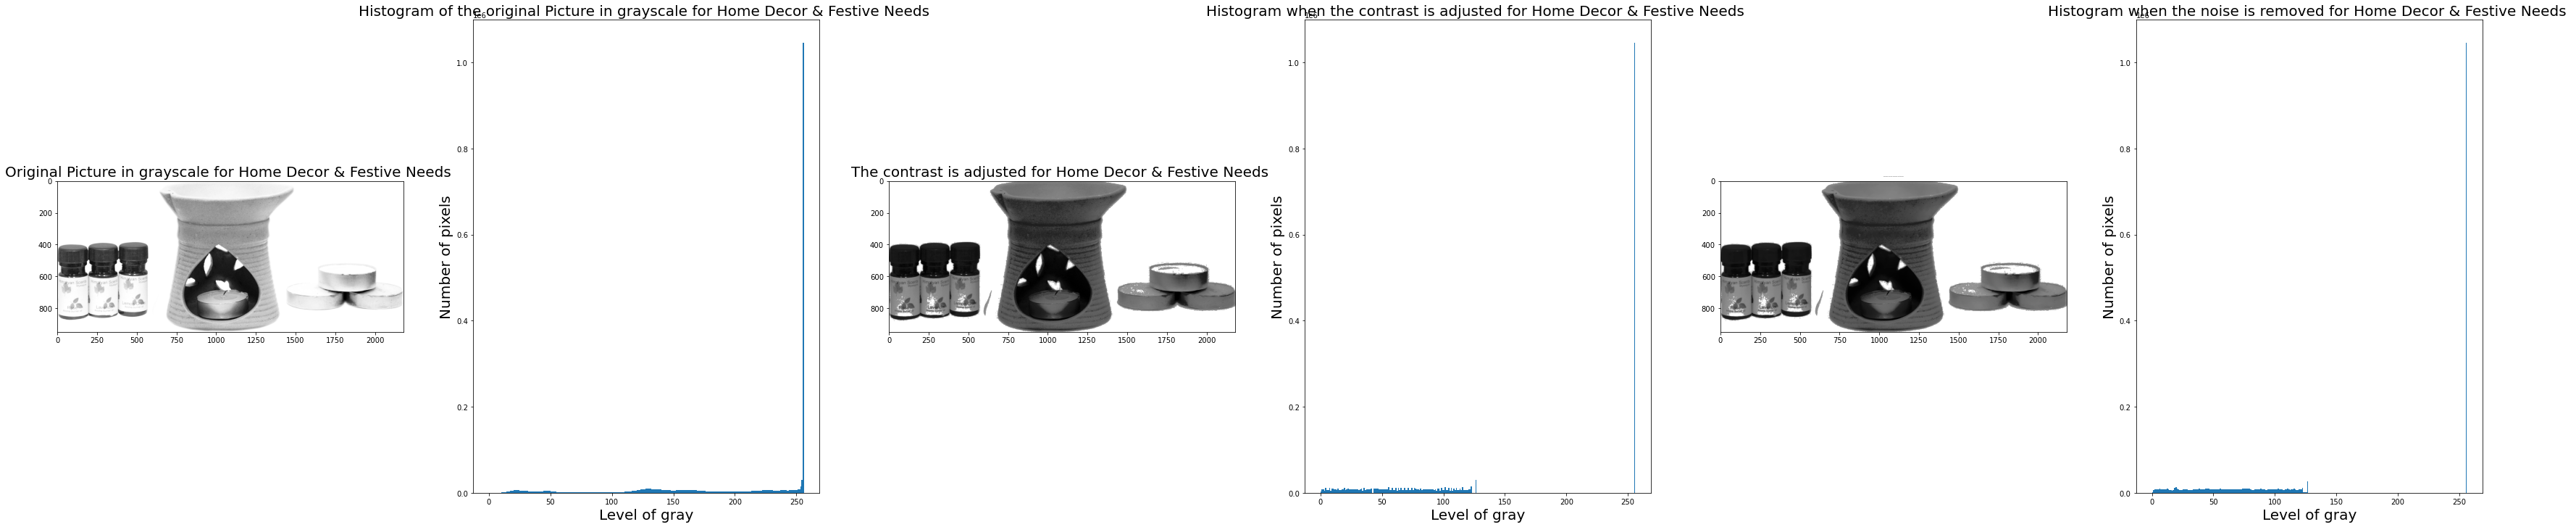

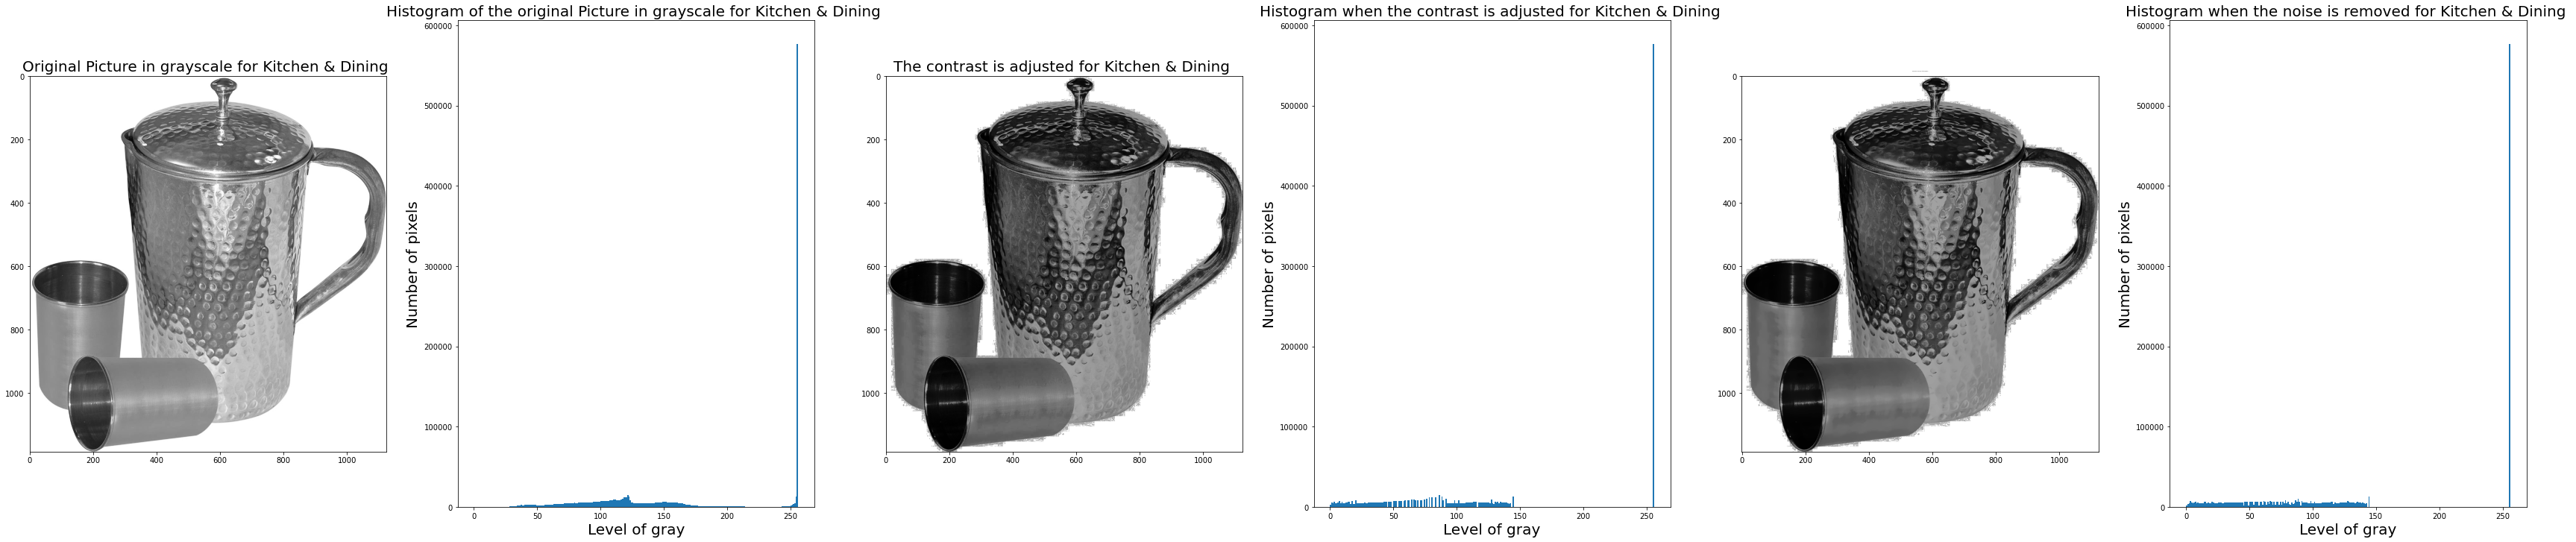

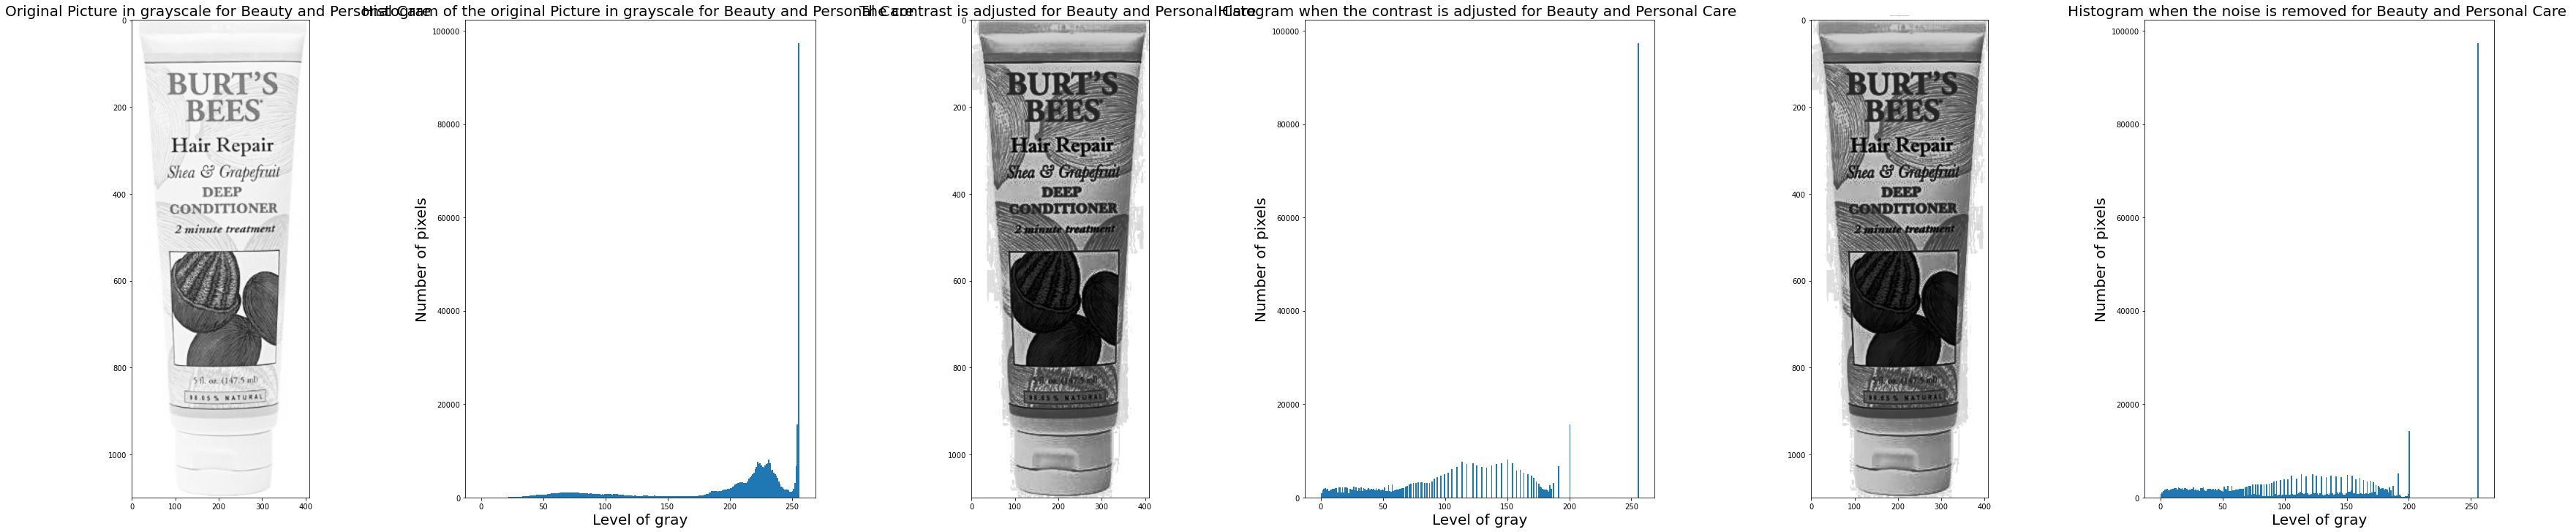

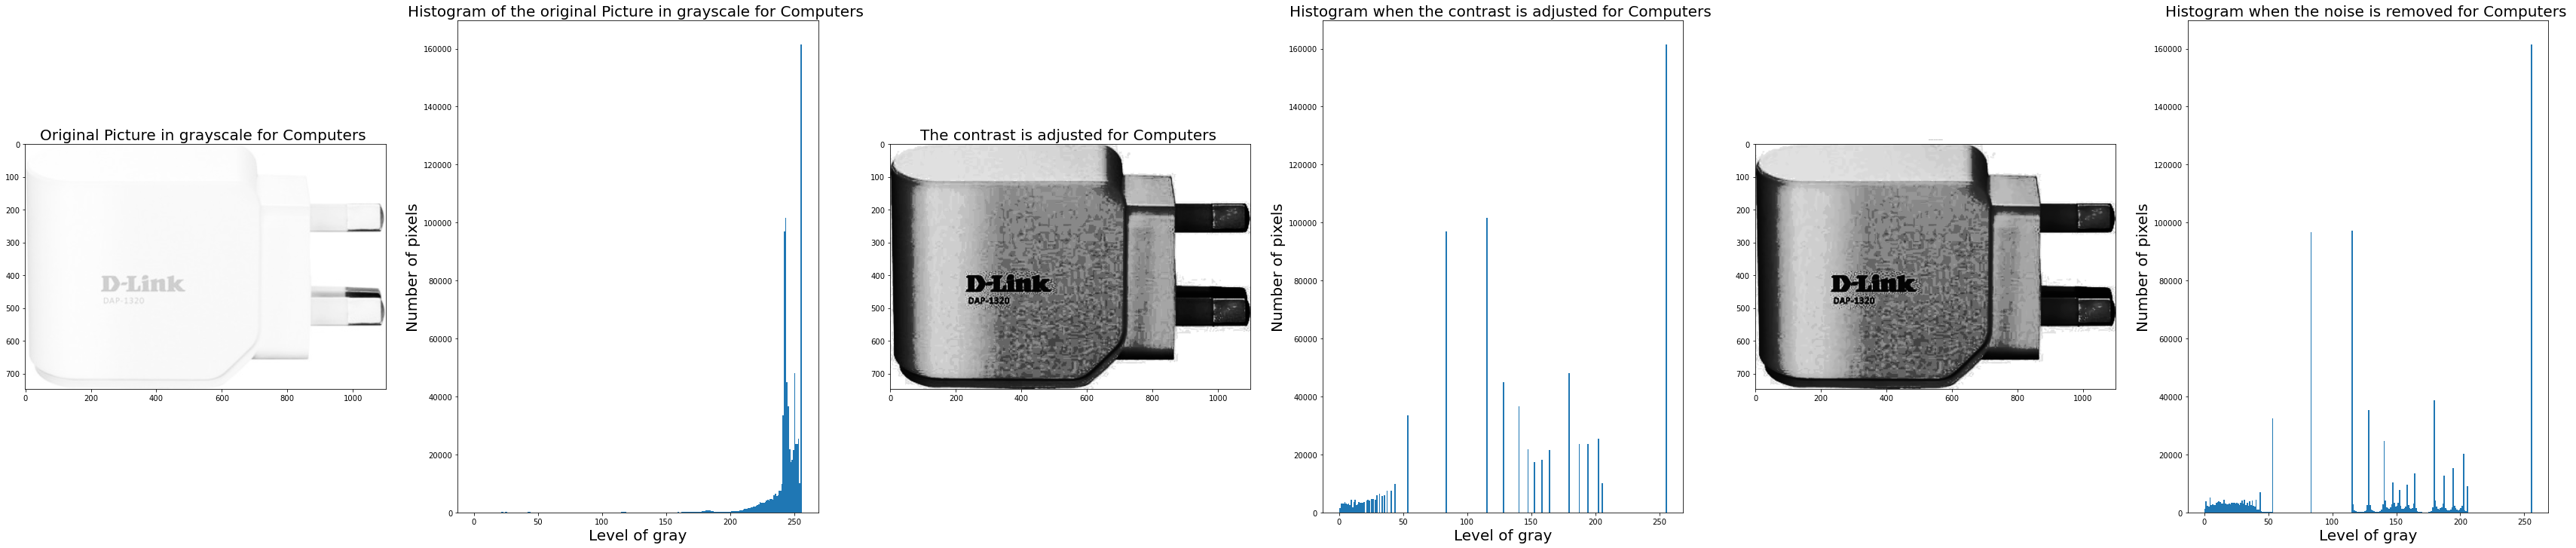

In [10]:
for category in main_categories:
    print(category)
    # input_df.loc[category, 'product_main_category']
    image_name = input_df.loc[input_df['product_main_category'] == category].iloc[0]['image']
    print(image_name)
    # Charger l'image
    clean_picture_display(image_name, category)

In [ ]:
save_clean_picture('2d50e4c6ccf8befe9335ac8f97a11712.jpg')

### Save the clean pictures

In [ ]:
input_df['image'].apply(save_clean_picture)

### Resize the picture

In [ ]:
def resize(img, new_size, h, w):
    """
    Changes the largest side of an image to the new size and changes the other to maintain the aspect ratio.
    Args:
        img (BGR Matrix): The image that is going to be resized.
        new_size (integer): The value wanted for the biggest side of the image.
    Returns:
        BGR Matrix: The image resized to the new value keeping the aspect ratio.
    """
    if h > w:
        new_h = 250
        new_w = (250 * w) / h
    else:
        new_h = (250 * h) / w
        new_w = 250
    img = cv.resize(img, ((int)(new_w), (int)(new_h)))
    return img

In [ ]:
def save_resizedimage(imagename):
    imagetoresize = cv.imread(picture_directory+imagename.split('.jpg')[0]+'_clean.jpg')
    resize_to = 250
    h, w, channels = imagetoresize.shape
    if h > resize_to or w > resize_to:
        imagetoresize = resize(imagetoresize, resize_to, h, w)
    cv.imwrite(picture_directory+imagename.split('.jpg')[0]+'_resized.jpg', imagetoresize)

In [ ]:
input_df['image'].apply(save_resizedimage)